In [1]:
# Assignment 1
# Freddie Vasquez-Rios
# 801170633

# PART 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#
df = pd.read_csv('./D3.csv')
df.head(100)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [3]:
dataset = df.values[:,:]
print(dataset[:20,:])

[[0.         3.44       0.44       4.38754501]
 [0.04040404 0.1349495  0.88848485 2.6796499 ]
 [0.08080808 0.82989899 1.3369697  2.96848981]
 [0.12121212 1.52484848 1.78545454 3.25406475]
 [0.16161616 2.21979798 2.23393939 3.53637472]
 [0.2020202  2.91474747 2.68242424 3.81541972]
 [0.24242424 3.60969697 3.13090909 4.09119974]
 [0.28282828 0.30464646 3.57939394 2.36371479]
 [0.32323232 0.99959596 0.02787879 3.83296487]
 [0.36363636 1.69454546 0.47636364 4.09894997]
 [0.4040404  2.38949495 0.92484849 4.3616701 ]
 [0.44444444 3.08444444 1.37333333 4.62112526]
 [0.48484848 3.77939394 1.82181818 4.87731544]
 [0.52525252 0.47434343 2.27030303 3.13024065]
 [0.56565657 1.16929293 2.71878788 3.37990089]
 [0.60606061 1.86424242 3.16727273 3.62629616]
 [0.64646465 2.55919192 3.61575758 3.86942645]
 [0.68686869 3.25414141 0.06424242 5.30929177]
 [0.72727273 3.94909091 0.51272727 5.54589212]
 [0.76767677 0.6440404  0.96121212 3.77922749]]


In [4]:
X = df.values[:,0:3]
Y = df.values[:,3]
len(X), len(Y)

(100, 100)

In [5]:
print('X =', X[:5])
print('Y =', Y[:5])

X = [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]
Y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


In [6]:
# Reshape function to convert 1D array to 2D array (100x1)
m = len(X)
X_1 = X.reshape(m,3)
print("X_1 =", X_1[:5,:])

X_1 = [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]


In [7]:
# Create a single column of ones (X_0)
m = len(X)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 100)

In [8]:
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [9]:
theta = np.zeros((4,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

In [10]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [11]:
# Compute the cost for theta values
cost = compute_loss(X, Y, theta)
print("The cost for all given theta =", cost)

The cost for all given theta = 552.4438459196241


In [12]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""
def gradient_descent(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta)
    return theta, loss_history

In [13]:
theta = [0., 0., 0., 0.]
iterations = 2500
alpha = 0.01

In [14]:
theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [ 4.88518623 -1.94311861  0.60344978 -0.20272198]
loss_history = [5.21542243 4.97171977 4.7765543  ... 0.74830606 0.74828645 0.74826687]


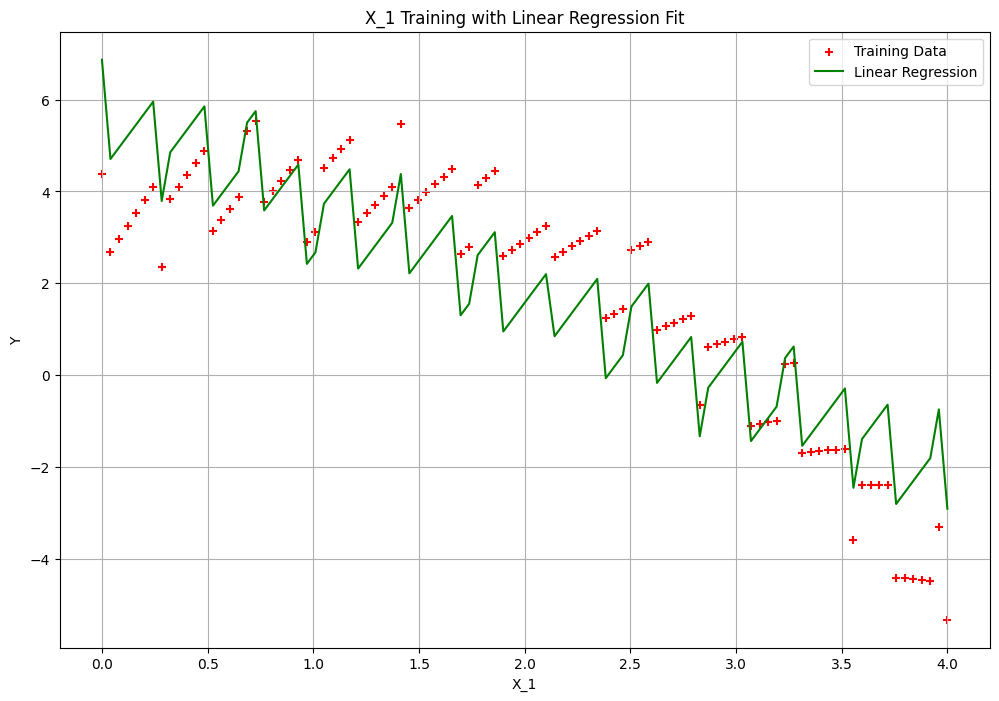

In [20]:
# Graphing linear regression with training data points
plt.scatter(X[:,1], Y, color='red', marker='+', label= 'Training Data')
plt.plot(X[:,1], X.dot(theta), color='green', label= 'Linear Regression')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.xlabel("X_1")
plt.ylabel("Y")
plt.title("X_1 Training with Linear Regression Fit")
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

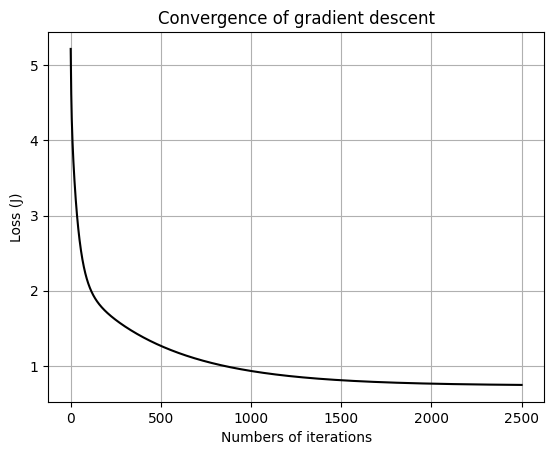

In [15]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")

In [16]:
print(theta)

[ 4.88518623 -1.94311861  0.60344978 -0.20272198]


In [17]:
theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]
theta3 = theta[3]
new_x1 = 1
new_x2 = 1
new_x3 = 1
# X0 = 1
prediction1 = new_x3*theta3 + new_x2*theta2 + new_x1*theta1 + theta0*1
print("The new Y value of h(1,1,1) is",prediction1)

The new Y value of h(1,1,1) is 3.34279542031987


In [18]:
theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]
theta3 = theta[3]
new_x1 = 2
new_x2 = 0
new_x3 = 4
# X0 = 1
prediction2 = new_x3*theta3 + new_x2*theta2 + new_x1*theta1 + theta0*1
print("The new Y value of h(2,0,4) is",prediction2)

The new Y value of h(2,0,4) is 0.18806109519189285


In [19]:
theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]
theta3 = theta[3]
new_x1 = 3
new_x2 = 2
new_x3 = 1
# X0 = 1
prediction3 = new_x3*theta3 + new_x2*theta2 + new_x1*theta1 + theta0*1
print("The new Y value of h(3,2,1) is",prediction3)

The new Y value of h(3,2,1) is 0.060007979363385644


# END